<a href="https://colab.research.google.com/github/9645258/aiffel/blob/main/dataton/%5BDataton_Team06%5D03_Okt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터톤
<br/>Okt

**개발 환경**
<br/>**데이터 불러오기**
<br/>**전처리**
* Null 값 제외
* 동의어 제외

**토큰화**
* Okt
* 명사/형태소 빈도수 csv 파일을 바탕으로 불용어 리스트 수정

**형태소 빈도수 csv 파일**
<br/>**명사 빈도수 csv 파일 (한 글자 단어 제외)**

**토큰화**
* Okt

**Okt + wordlist_to_indexlist**
* 정제
* 토큰화
* 단어 인덱스 생성
* 정수 인코딩

**시각화**
* 문장 길이 및 분포
* 적절한 최대 문장 길이 지정

* LDA (토픽 모델링)
> 한 글자 단어 제외한 토큰화
<br/>훈련 및 시각화
<br/>토픽 40개

* 워드클라우드
> 한 글자 단어 제외한 토큰화
<br/>시각화

* Folium
> 행정구역(SHP) 데이터
<br/>행정구역명 데이터
<br/>행정구역별 지역명 빈도수 통계 데이터
<br/>행정구역별 지역명 빈도수 지도
<br/>버블 차트
<br/>히트맵

**결론**
<br/>**참고문헌**

# 개발환경

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Jun  2 01:13:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import os

##Okt 설치

In [ ]:
# bash 셸로 명령어 입력하여 라이브러리 설치하기

%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [1,992 kB]
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86

In [ ]:
# JAVA_HOME 환경변수 설정하기

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
# okt 사용해보기 from konlpy

from konlpy.tag import Okt
okt=Okt()

# 형태소
print("okt.morphs : ", okt.morphs('안녕하세요. 저는 딥러닝 입니다.'))

# 명사
print("okt.nouns : ", okt.nouns('안녕하세요. 저는 딥러닝 입니다.'))

# 형태소 + 품사
print("okt.pos : ", okt.pos('안녕하세요. 저는 딥러닝 입니다.'))

okt.morphs :  ['안녕하세요', '.', '저', '는', '딥', '러닝', '입니다', '.']
okt.nouns :  ['저', '딥', '러닝']
okt.pos :  [('안녕하세요', 'Adjective'), ('.', 'Punctuation'), ('저', 'Noun'), ('는', 'Josa'), ('딥', 'Noun'), ('러닝', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation')]


#데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dataton/event_conversation.csv")

In [ ]:
data

,text
0,시스템 사진 비행시간봐 엄청나게 오래걸리네 비행기에서 하루 잔다고 생각해 그래 이...
1,아 그 호텔 나도 예약할 지경이야 이면 옆방으로다가요 그래도 괜찮은 호텔인데 뭐지...
2,오 이래도 되나 싶을정도로 신호에 걸리는군 내려서 뛰가는게 빠를듯 웨이팅 많아 걸...
3,으로 봄 일단 왜죠 나 월 일부터 쉰다구 근데 월 일이 목욜이라서 우리 이틀밖에 ...
4,근데 나는 원주간다 엥 금 갑자기 왜가 진짜 갑자기 감다 아빠가 갑자기 가쟤 사촌...
...,...
9995,코스요리나오면서 식보는거야 먹으면서동시에 엄청비싸겠다 코스면 모르지 식 다보고 가...
9996,삼성역 내일 볼까 오호 머리 다자르면 시 반쯤 될텐뎅 아닌가 시인가 삼성역에서 보...
9997,오늘데이트는 꽝인건가요 데이트는 강행입니다 맛난거 사드리지요 아니야 돈도없는데 집...
9998,너 졸업 여름에하지마 땀나서 머리 다 망함 이모티콘 그리고 졸업사진 찍으러가서 이...


In [ ]:
data.head

<bound method NDFrame.head of                                                    text
0      시스템 사진 비행시간봐 엄청나게 오래걸리네 비행기에서 하루 잔다고 생각해 그래 이...
1      아 그 호텔 나도 예약할 지경이야 이면 옆방으로다가요 그래도 괜찮은 호텔인데 뭐지...
2      오 이래도 되나 싶을정도로 신호에 걸리는군 내려서 뛰가는게 빠를듯 웨이팅 많아 걸...
3      으로 봄 일단 왜죠 나 월 일부터 쉰다구 근데 월 일이 목욜이라서 우리 이틀밖에 ...
4      근데 나는 원주간다 엥 금 갑자기 왜가 진짜 갑자기 감다 아빠가 갑자기 가쟤 사촌...
...                                                 ...
9995   코스요리나오면서 식보는거야 먹으면서동시에 엄청비싸겠다 코스면 모르지 식 다보고 가...
9996   삼성역 내일 볼까 오호 머리 다자르면 시 반쯤 될텐뎅 아닌가 시인가 삼성역에서 보...
9997   오늘데이트는 꽝인건가요 데이트는 강행입니다 맛난거 사드리지요 아니야 돈도없는데 집...
9998   너 졸업 여름에하지마 땀나서 머리 다 망함 이모티콘 그리고 졸업사진 찍으러가서 이...
9999   아 마쟈 이름 나 방탈출 취소 까먹음 갑자기 전화와서 놀랐네 언능 해야게따 아아아...

[10000 rows x 1 columns]>

In [ ]:
print(data[0:1]['text'])

0     시스템 사진 비행시간봐 엄청나게 오래걸리네 비행기에서 하루 잔다고 생각해 그래 이...
Name: text, dtype: object


#전처리

##Null 값 제외

In [ ]:
data.dropna(axis=0, inplace=True)
print('Null 값 제거 후 전체 샘플 수:', (len(data)))

Null 값 제거 후 전체 샘플 수: 10000


##동의어 제외

In [ ]:
contractions = {"엄마": "어머니", "아빠": "아버지", "여보": "여봉", "친구": "칭구", "이번주": "요번주", "보자" : "보쟈", 
                "보자" : "보장", "아마": "아마도", "근데": "그런데", "그냥": "구냥", "그니까": "그러니까", "머": "머머",
                "얼른": "언능", "언제": "언제쯤", "괜찮아": "괜츈", "오키오키": "오키도키", "알았어": "아라써",
                "알았어": "알써", "그래": "그려", "아냐": "아냐아냐", "어차피": "어짜피", "마자": "마쟈", "조아": "죠아",
                "허허허": "허허", "흠": "훔", "미안": "미안해"}
                
print("정규화 사전 수: ", len(contractions))

정규화 사전 수:  24


In [ ]:
def preprocess_sentence(sentence):
  sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")])
  return sentence

In [ ]:
clean_text = []
for s in data['text']:
    clean_text.append(preprocess_sentence(s))

print("text 전처리 후 결과: ", clean_text[:1])

text 전처리 후 결과:  [' 시스템 사진 비행시간봐 엄청나게 오래걸리네 비행기에서 하루 잔다고 생각해 그려 이때 아니면 언제쯤 가보겠냐 이번이 기회다 그려 바로 결제 고고 ']


In [ ]:
data['text'] = clean_text

#토큰화

##Okt

In [ ]:
tokenizer = Okt()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
def okt_morphs(data, num_words=10000):
    data.drop_duplicates(subset=['text'], inplace=True)
    data = data.dropna(how = 'any') 
  
    X_okt_morph_list = []
    for sentence in data['text']:
        temp_X = tokenizer.morphs(sentence) 
        temp_X = [word for word in temp_X if not word in stopwords] 
        X_okt_morph_list.append(temp_X)
    return X_okt_morph_list

In [ ]:
X_okt_morphs = okt_morphs(data) 

In [ ]:
type(X_okt_morphs[:1])

list

In [ ]:
X_okt_morphs[1:2][0]

['아',
 '그',
 '호텔',
 '나도',
 '예약',
 '할',
 '지경',
 '이야',
 '이면',
 '옆방',
 '다가',
 '요',
 '그래도',
 '괜찮은',
 '호텔',
 '인데',
 '뭐',
 '지',
 '뭐',
 '냐',
 '진짜',
 '호텔',
 '어디',
 '냐',
 '고']

In [ ]:
for i in range(0, len(X_okt_morphs[:1][0])):
  if i % 4 == 0 :
    print() 
  print(X_okt_morphs[:1][0][i], end=' ')


시스템 사진 비행 시간 
봐 엄청나게 오래 걸리네 
비행기 에서 하루 잔다고 
생각 해 그려 때 
아니면 언제 쯤 가보겠냐 
이번 기회 다 그려 
바로 결제 고고 

#형태소 빈도수 csv 파일

In [ ]:
import itertools
from collections import Counter

In [ ]:
X_okt_morphs = okt_morphs(data)

In [ ]:
onedim_morph_words = list(itertools.chain(*X_okt_morphs))

In [ ]:
morph_count = Counter(onedim_morph_words)
morph_words = dict(morph_count.most_common())

In [ ]:
type(morph_words)

dict

In [ ]:
morph_words['왜']

726

In [ ]:
morph_series = pd.Series(morph_words)

In [ ]:
morph_series

나         5731
이름        4803
시         3754
아         3584
안         2579
          ... 
학위           1
빌랴           1
하고싶었는디       1
운젠           1
사부           1
Length: 44939, dtype: int64

In [ ]:
morph_df = pd.DataFrame(morph_series).reset_index()
morph_df.columns = ['형태소', '빈도수']

In [ ]:
morph_df.head()

,형태소,빈도수
0,나,5731
1,이름,4803
2,시,3754
3,아,3584
4,안,2579


In [ ]:
morph_df.to_csv('/content/drive/MyDrive/Dataton/morph_dict.csv', index=False)

In [ ]:
morph_dict_path = '/content/drive/MyDrive/Dataton/morph_dict.csv'
morph_dict_csv = pd.read_csv(morph_dict_path)

In [ ]:
morph_dict_csv

,형태소,빈도수
0,나,5731
1,이름,4803
2,시,3754
3,아,3584
4,안,2579
...,...,...
44934,학위,1
44935,빌랴,1
44936,하고싶었는디,1
44937,운젠,1


#명사 빈도수 csv 파일 (한 글자 단어 제외)

곰, 문, 달, 발 등 길이가 1인 단어는 제외

In [ ]:
def okt_nouns_list(data):
    data.drop_duplicates(subset=['text'], inplace=True)
    data = data.dropna(how = 'any') 
    temp_X_list = []
    for i in range(len(data['text'])):
      temp_X = tokenizer.nouns(data['text'][i])
      two = [x for x in temp_X if len(x) > 1 and not x in stopwords]
      temp_X_list.append(two)
         
    return temp_X_list

In [ ]:
X_okt_nouns_two = okt_nouns_list(data) 

In [ ]:
import itertools
from collections import Counter

In [ ]:
onedim_X_okt_nouns_two = list(itertools.chain(*X_okt_nouns_two))

In [ ]:
nouns_count = Counter(onedim_X_okt_nouns_two)
nouns_words = dict(nouns_count.most_common())

In [ ]:
type(nouns_words)

dict

In [ ]:
nouns_words['서울']

334

In [ ]:
nouns_series = pd.Series(nouns_words)

In [ ]:
nouns_series

이름      4803
우리      1963
시간      1662
오늘      1571
이모티콘    1311
        ... 
빠룸         1
졸업사진       1
학위         1
운젠         1
사부         1
Length: 18865, dtype: int64

In [ ]:
nouns_df = pd.DataFrame(nouns_series).reset_index()
nouns_df.columns = ['명사', '빈도수']

In [ ]:
nouns_df.head()

,명사,빈도수
0,이름,4803
1,우리,1963
2,시간,1662
3,오늘,1571
4,이모티콘,1311


In [ ]:
nouns_df.to_csv('/content/drive/MyDrive/Dataton/nouns_dict.csv', index=False)

In [ ]:
nouns_dict_path = '/content/drive/MyDrive/Dataton/nouns_dict.csv'
nouns_dict_csv = pd.read_csv(nouns_dict_path)

In [ ]:
nouns_dict_csv

,명사,빈도수
0,이름,4803
1,우리,1963
2,시간,1662
3,오늘,1571
4,이모티콘,1311
...,...,...
18860,빠룸,1
18861,졸업사진,1
18862,학위,1
18863,운젠,1


#토큰화

## Okt

In [ ]:
tokenizer = Okt()
revised_stopwords = ['의','가','이','은','들','는','좀','잘','걍','과''도','를','으로','자','에','와','한','하다'
,' 박 일', '이름', '계정', '전번', '주소', '소속', '기타', '이모티콘', '시스템 사진',
' 월 일', ' 일날', ' 시', ' 시 반', ' 분', ' 이랑', ' 랑',]

In [ ]:
def revised_okt_morphs(data, num_words=10000):
    data.drop_duplicates(subset=['text'], inplace=True)
    data = data.dropna(how = 'any') 
  
    X_okt_morph_list = []
    for sentence in data['text']:
        temp_X = tokenizer.morphs(sentence) 
        temp_X = [word for word in temp_X if not word in revised_stopwords] 
        X_okt_morph_list.append(temp_X)
    return X_okt_morph_list

In [ ]:
revised_X_okt_morphs = revised_okt_morphs(data) 

In [ ]:
type(revised_X_okt_morphs[:1])

list

In [ ]:
revised_X_okt_morphs[1:2][0]

['아',
 '그',
 '호텔',
 '나도',
 '예약',
 '할',
 '지경',
 '이야',
 '이면',
 '옆방',
 '다가',
 '요',
 '그래도',
 '괜찮은',
 '호텔',
 '인데',
 '뭐',
 '지',
 '뭐',
 '냐',
 '진짜',
 '호텔',
 '어디',
 '냐',
 '고']

In [ ]:
for i in range(0, len(revised_X_okt_morphs[:1][0])):
  if i % 4 == 0 :
    print() 
  print(revised_X_okt_morphs[:1][0][i], end=' ')


시스템 사진 비행 시간 
봐 엄청나게 오래 걸리네 
비행기 에서 하루 잔다고 
생각 해 그려 때 
아니면 언제 쯤 가보겠냐 
이번 기회 다 그려 
바로 결제 고고 

#Okt + wordlist_to_indexlist

In [ ]:
def revised_Tokenizer(data, num_words=10000):
    data.drop_duplicates(subset=['text'], inplace=True)
    data = data.dropna(how = 'any') 
  
    X = []
    for sentence in data['text']:
        temp_X = tokenizer.morphs(sentence) 
        temp_X = [word for word in temp_X if not word in revised_stopwords] 
        X.append(temp_X)
    
    words = np.concatenate(X).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
        
    X = list(map(wordlist_to_indexlist, X))
        
    return X, word_to_index

###정제
drop_duplicates는 데이터의 중복을 제거한다.
<br/>dropna는 NaN 결측치를 제거한다.

###토큰화
tokenizer는 Mecab 형태소 분석기를 이용해 토큰화하고
<br/>불용어(Stopwords)는 토큰화에 포함시키지 않는다.

###단어 인덱스 생성
concatenate는 단어 numpy 배열을 하나로 합친다.
 <br/>counter는 단어의 수를 합산한다.
 <br/>enumerate는 반복문 사용 시 몇 번째 반복문인지 확인한다.
 <br/>이를 통해 단어 사전 word_to_index를 구성한다.
 <br/>텍스트 스트링을 사전 인덱스 스트링으로 변환한다.

In [ ]:
X, word_to_index = revised_Tokenizer(data) 

In [ ]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [ ]:
index_to_word

{0: '<PAD>',
 1: '<BOS>',
 2: '<UNK>',
 3: '<UNUSED>',
 4: '나',
 5: '시',
 6: '아',
 7: '도',
 8: '안',
 9: '에서',
 10: '그럼',
 11: '일',
 12: '다',
 13: '우리',
 14: '너',
 15: '로',
 16: '내',
 17: '시간',
 18: '집',
 19: '야',
 20: '만',
 21: '랑',
 22: '그런데',
 23: '오늘',
 24: '그',
 25: '뭐',
 26: '고',
 27: '쯤',
 28: '난',
 29: '오',
 30: '구',
 31: '서',
 32: '웅',
 33: '네',
 34: '내일',
 35: '거',
 36: '하고',
 37: '못',
 38: '지금',
 39: '지',
 40: '몇',
 41: '까지',
 42: '해',
 43: '요',
 44: '응',
 45: '같이',
 46: '저녁',
 47: '때',
 48: '언니',
 49: '을',
 50: '나도',
 51: '시스템',
 52: '월',
 53: '사진',
 54: '분',
 55: '날',
 56: '여',
 57: '진짜',
 58: '하',
 59: '저',
 60: '어디',
 61: '냥',
 62: '거기',
 63: '먹고',
 64: '언제',
 65: '더',
 66: '낼',
 67: '응응',
 68: '아니',
 69: '게',
 70: '밥',
 71: '면',
 72: '너무',
 73: '생각',
 74: '말',
 75: '도착',
 76: '이랑',
 77: '두',
 78: '곳',
 79: '가서',
 80: '가면',
 81: '니',
 82: '왜',
 83: '가자',
 84: '어',
 85: '그려',
 86: '엉',
 87: '일단',
 88: '웅웅',
 89: '이야',
 90: '출발',
 91: '사람',
 92: '해서',
 93: '중',
 94: '좋아',
 

##정수 인코딩

In [ ]:
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

In [ ]:
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

In [ ]:
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:]) 

In [ ]:
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

#시각화

##문장 길이 및 분포

In [ ]:
total_data_text = list(X)
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

문장 개수 :  10000
최소 길이 :  201
최대 길이 :  201
평균 :  39.6091
표준편차 :  17.54033344010313


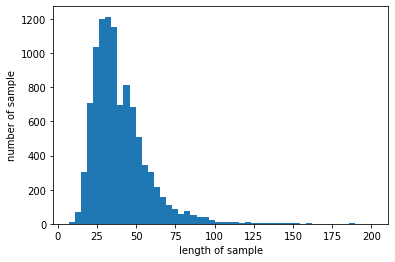

In [ ]:
print('문장 개수 : ',  len(num_tokens))
print('최소 길이 : ', np.max(num_tokens))
print('최대 길이 : ', np.max(num_tokens))
print('평균 : ', np.mean(num_tokens))
print('표준편차 : ', np.std(num_tokens))

plt.hist([s for s in num_tokens if s >= 1], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

최대 : 201
평균 : 39.6091
중앙값 : 36.0


<function matplotlib.pyplot.show>

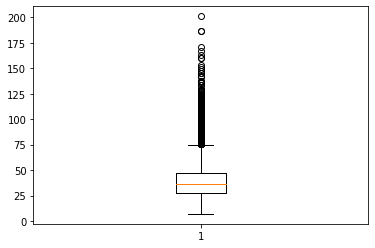

In [ ]:
print('최대 : {}'.format(np.max(num_tokens)))
print('평균 : {}'.format(np.mean(num_tokens)))
print('중앙값 : {}'.format(np.median(num_tokens)))

plt.boxplot(num_tokens)
plt.show

##적절한 최대 문장 길이 지정

In [ ]:
max_tokens = np.mean(num_tokens) + np.std(num_tokens)
text_max_len = int(max_tokens)
print('pad_sequences maxlen : ', text_max_len)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

pad_sequences maxlen :  57
전체 문장의 0.8742%가 maxlen 설정값 이내에 포함됩니다. 


평균에 표준편차를 더한 것으로 최대 문장 길이를 지정한다.

이 길이를 선택했을 때, 얼마나 많은 샘플들을 자르지 않고 포함할 수 있는지 통계로 확인한다.

##LDA (토픽 모델링)

사람들은 행사의 어떤 주제에 대해 관심을 갖는가?
<br/>대화 텍스트에서 중심 키워드를 추출하여 사람들의 관심사를 알아본다.

**참고사이트**
<br/>[유원준 외 1명, 딥러닝을 이용한 자연어 처리 입문, wikidocs, 2022](https://wikidocs.net/30708)

토픽 모델링은 문서의 집합에서 토픽을 찾아내는 프로세스를 말한다.
<br/>이는 검색 엔진, 고객 민원 시스템 등과 같이 문서의 주제를 알아내는 일이 중요한 곳에서 사용된다.
<br/>잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)은 토픽 모델링의 대표적인 알고리즘이다. 

In [ ]:
tokenizer = Okt()
revised_stopwords = ['의','가','이','은','들','는','좀','잘','걍','과''도','를','으로','자','에','와','한','하다'
,' 박 일', '이름', '계정', '전번', '주소', '소속', '기타', '이모티콘', '시스템 사진',
' 월 일', ' 일날', ' 시', ' 시 반', ' 분', ' 이랑', ' 랑',]

In [ ]:
len(data['text'])

10000

###한 글자 단어 제외한 토큰화
<br/>곰, 문, 달, 발 등 길이가 1인 단어는 제외

In [ ]:
tokenizer = Okt()
revised_stopwords = ['의','가','이','은','들','는','좀','잘','걍','과''도','를','으로','자','에','와','한','하다'
,' 박 일', '이름', '계정', '전번', '주소', '소속', '기타', '이모티콘', '시스템 사진',
' 월 일', ' 일날', ' 시', ' 시 반', ' 분', ' 이랑', ' 랑',]

In [ ]:
def revised_okt_nouns_list(data):
    data.drop_duplicates(subset=['text'], inplace=True)
    data = data.dropna(how = 'any') 
    temp_X_list = []
    for i in range(len(data['text'])):
      temp_X = tokenizer.nouns(data['text'][i])
      two = [x for x in temp_X if len(x) > 1 and not x in revised_stopwords]
      temp_X_list.append(two)
         
    return temp_X_list

In [ ]:
revised_X_okt_nouns_two = revised_okt_nouns_list(data) 

자료형은 중첩리스트이다.<br>
[ [], [], [], [] ]

In [ ]:
type(revised_X_okt_nouns_two)

list

In [ ]:
type(revised_X_okt_nouns_two[:2])

list

In [ ]:
print(revised_X_okt_nouns_two[:2], end='')

[['시스템', '사진', '비행', '시간', '비행기', '하루', '생각', '언제', '이번', '기회', '바로', '결제', '고고'], ['호텔', '예약', '지경', '이면', '옆방', '다가', '호텔', '진짜', '호텔', '어디']]

In [ ]:
type(revised_X_okt_nouns_two[:2][0][0])

str

In [ ]:
print(revised_X_okt_nouns_two[:1][0][:3], end='')

['시스템', '사진', '비행']

단어 단위로 토크나이즈한 토큰 집합을 가져온다.

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(revised_X_okt_nouns_two)
corpus = [dictionary.doc2bow(text) for text in revised_X_okt_nouns_two]
print(corpus[1]) # 수행된 결과에서 두번째 대화 출력. 첫번째 대화의 인덱스는 0

[(13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 3)]


각 단어에 정수 인코딩을 하는 동시에, 각 뉴스에서의 단어의 빈도수를 기록한다.
<br/>여기서는 각 단어를 (word_id, word_frequency)의 형태로 바꾼다.<br>
 word_id는 단어가 정수 인코딩된 값
 <br/>word_frequency는 해당 뉴스에서의 해당 단어의 빈도수를 의미한다.

In [ ]:
print(dictionary[13])

다가


In [ ]:
len(dictionary)

18857

한 글자 단어 제외 시 총 학습된 단어의 개수 18857개

In [ ]:
def revised_okt_nouns_list(data, num_words=10000):
    data.drop_duplicates(subset=['text'], inplace=True)
    data = data.dropna(how = 'any') 
  
    X_okt_nouns_list2 = []
    for sentence in data['text']:
        temp_X = tokenizer.nouns(sentence) 
        temp_X = [word for word in temp_X if not word in revised_stopwords] 
        X_okt_nouns_list2.append(temp_X)
    return X_okt_nouns_list2

In [ ]:
revised_X_okt_nouns_included_one = revised_okt_nouns_list(data) 

In [ ]:
from gensim import corpora
dictionary_included_one = corpora.Dictionary(revised_X_okt_nouns_included_one)
corpus_included_one = [dictionary.doc2bow(text) for text in revised_X_okt_nouns_included_one]

In [ ]:
len(dictionary_included_one)

20349

한 글자 단어 포함시 총 학습된 단어의 개수 20349개

In [ ]:
len(dictionary_included_one) - len(dictionary)

1492

LDA를 위해 제외된 한 글자 단어의 개수는 1492개

###훈련 및 시각화

####토픽 40개

In [ ]:
import gensim
NUM_TOPICS = 40 # 40개의 토픽, k=40
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)

In [ ]:
for topic in topics:
    print(topic)

(10, '0.044*"결혼식" + 0.034*"맥주" + 0.023*"한잔" + 0.019*"피자"')
(21, '0.057*"병원" + 0.027*"내년" + 0.024*"방금" + 0.021*"처음"')
(14, '0.021*"거기" + 0.020*"환전" + 0.019*"강원도" + 0.017*"새벽"')
(19, '0.038*"한시" + 0.027*"머리" + 0.023*"두시" + 0.022*"무조건"')
(4, '0.179*"시스템" + 0.173*"사진" + 0.044*"검색" + 0.027*"저기"')
(11, '0.186*"내일" + 0.077*"점심" + 0.027*"저녁" + 0.027*"시간"')
(13, '0.071*"아빠" + 0.036*"거기" + 0.020*"해외" + 0.018*"괜차"')
(30, '0.054*"커피" + 0.050*"운동" + 0.022*"하루" + 0.017*"아유"')
(9, '0.054*"생일" + 0.026*"화요일" + 0.024*"괜츈" + 0.018*"월욜"')
(16, '0.054*"휴가" + 0.036*"누구" + 0.032*"갑자기" + 0.025*"그때"')
(35, '0.151*"오늘" + 0.060*"퇴근" + 0.021*"홍대" + 0.020*"오키도키"')
(25, '0.140*"카페" + 0.062*"여기" + 0.047*"수업" + 0.033*"어디"')
(38, '0.081*"부산" + 0.024*"우리" + 0.016*"당근" + 0.015*"선택"')
(2, '0.074*"버스" + 0.072*"타고" + 0.029*"택시" + 0.024*"날씨"')
(26, '0.070*"취소" + 0.028*"우리" + 0.027*"파티" + 0.019*"당일"')
(23, '0.029*"강릉" + 0.021*"베트남" + 0.020*"방콕" + 0.018*"다낭"')
(32, '0.118*"호텔" + 0.024*"운전" + 0.018*"호캉스" + 0.017*"항상"')
(3, '0.

In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 14.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=0dd80a6ea33242bb7d83e848bf8472198db89aeeb4e8527192ab1f1fa65828cb
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,31.0,0.3497,"[(1, 0.07910159), (4, 0.14590593), (8, 0.10488..."
1,1,32.0,0.3981,"[(2, 0.084055014), (12, 0.30737182), (20, 0.12..."
2,2,16.0,0.3994,"[(12, 0.1251308), (14, 0.11330691), (16, 0.399..."
3,3,16.0,0.3509,"[(15, 0.25516784), (16, 0.35090894), (20, 0.29..."
4,4,16.0,0.3400,"[(9, 0.2557592), (11, 0.25592428), (13, 0.0790..."
5,5,20.0,0.4125,"[(11, 0.10734722), (20, 0.41247958), (24, 0.25..."
6,6,2.0,0.4931,"[(1, 0.09157566), (2, 0.4931028), (5, 0.123935..."
7,7,2.0,0.7538,"[(2, 0.7538345), (8, 0.0790281), (14, 0.070684..."
8,8,36.0,0.2370,"[(2, 0.1416286), (4, 0.13109964), (6, 0.150939..."
9,9,5.0,0.3634,"[(5, 0.36341572), (12, 0.08541667), (21, 0.085..."


##워드 클라우드

**참고 사이트**
<br/>[카톡 데이터로 워드 클라우드 그리기](https://m.blog.naver.com/nilsine11202/221834254905)

###한 글자 단어 제외한 토큰화
<br/>곰, 문, 달, 발 등 길이가 1인 단어는 제외

In [ ]:
tokenizer = Okt()
revised_stopwords = ['의','가','이','은','들','는','좀','잘','걍','과''도','를','으로','자','에','와','한','하다'
,' 박 일', '이름', '계정', '전번', '주소', '소속', '기타', '이모티콘', '시스템 사진',
' 월 일', ' 일날', ' 시', ' 시 반', ' 분', ' 이랑', ' 랑',]

In [ ]:
def revised_okt_nouns_list(data):
    data.drop_duplicates(subset=['text'], inplace=True)
    data = data.dropna(how = 'any') 
    temp_X_list = []
    for i in range(len(data['text'])):
      temp_X = tokenizer.nouns(data['text'][i])
      two = [x for x in temp_X if len(x) > 1 and not x in revised_stopwords]
      temp_X_list.append(two)
         
    return temp_X_list

In [ ]:
revised_X_okt_nouns_two = revised_okt_nouns_list(data) 

In [ ]:
import itertools
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [ ]:
revised_onedim_X_okt_nouns_two = list(itertools.chain(*revised_X_okt_nouns_two))

하나의 리스트로 모은다.

In [ ]:
count = Counter(revised_onedim_X_okt_nouns_two)
words = dict(count.most_common())

In [ ]:
print(words.keys(), end='')

dict_keys(['우리', '시간', '오늘', '내일', '지금', '저녁', '언니', '시스템', '사진', '진짜', '어디', '거기', '언제', '생각', '도착', '가면', '일단', '웅웅', '출발', '사람', '카페', '여행', '이제', '일찍', '예약', '점심', '바로', '여기', '시반', '엄마', '친구', '그때', '이번', '가야', '약속', '보고', '정도', '주말', '숙소', '간다', '오빠', '토요일', '호텔', '버스', '제주도', '한번', '자기', '금요일', '오키', '타고', '그거', '서울', '준비', '퇴근', '갈래', '연락', '혼자', '하루', '다시', '아침', '부산', '얘기', '하나', '만원', '가도', '토욜', '일요일', '근처', '가기', '먼저', '검색', '영화', '취소', '저기', '가능', '아하', '바다', '어제', '고민', '그날', '아아', '하자', '아빠', '저번', '다음', '휴가', '혹시', '다음주', '금욜', '미리', '갑자기', '오키도키', '어디가', '번주', '구래', '어머니', '가지', '이따', '목요일', '평일', '보장', '수업', '생일', '일정', '대박', '얼마', '완전', '비행기', '월요일', '날짜', '오후', '일욜', '거의', '코로나', '계획', '나중', '그게', '고기', '가격', '괜츈', '벌써', '조금', '날씨', '구경', '회사', '결혼식', '다가', '자고', '별로', '수요일', '병원', '공항', '출근', '커피', '가게', '학교', '원래', '고고', '일이', '머머', '누구', '알바', '맛집', '지하철', '운동', '파티', '투어', '다행', '가족', '계속', '동생', '걱정', '마지막', '일본', '공부', '택시', '마쟈', '전화', '요즘', '거리', '맥주', '구랭'

In [ ]:
print(words.values(), end='')

dict_values([1963, 1662, 1571, 1214, 1116, 1056, 1002, 979, 950, 916, 897, 889, 869, 789, 780, 709, 657, 651, 641, 637, 605, 601, 571, 568, 541, 515, 513, 511, 509, 508, 494, 491, 489, 462, 445, 445, 433, 421, 419, 414, 408, 408, 391, 391, 386, 384, 384, 361, 358, 348, 346, 334, 333, 326, 316, 316, 314, 308, 301, 297, 297, 296, 284, 283, 280, 278, 265, 263, 261, 259, 248, 247, 246, 239, 238, 238, 237, 234, 232, 232, 232, 225, 220, 218, 217, 216, 216, 215, 214, 211, 208, 208, 207, 207, 206, 205, 203, 203, 201, 199, 199, 198, 197, 195, 194, 193, 182, 180, 180, 179, 177, 177, 175, 174, 173, 172, 169, 169, 168, 168, 167, 166, 164, 164, 164, 163, 162, 162, 162, 161, 161, 159, 158, 155, 155, 152, 151, 149, 149, 146, 146, 145, 144, 142, 142, 141, 140, 138, 137, 136, 136, 136, 134, 134, 133, 133, 132, 131, 131, 127, 127, 127, 126, 124, 124, 123, 122, 122, 120, 119, 119, 118, 117, 115, 114, 113, 113, 113, 113, 112, 112, 111, 111, 111, 111, 110, 110, 109, 106, 106, 106, 105, 105, 103, 103, 102, 

In [ ]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq  

Selecting previously unselected package fonts-nanum.
(Reading database ... 156205 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
font = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

코랩에서 한글 표기를 위해 폰트 설치

In [ ]:
wordcloud = WordCloud(font_path=font,
                      background_color='white', colormap = "hot",width=3000, height=2000).generate_from_frequencies(words) 

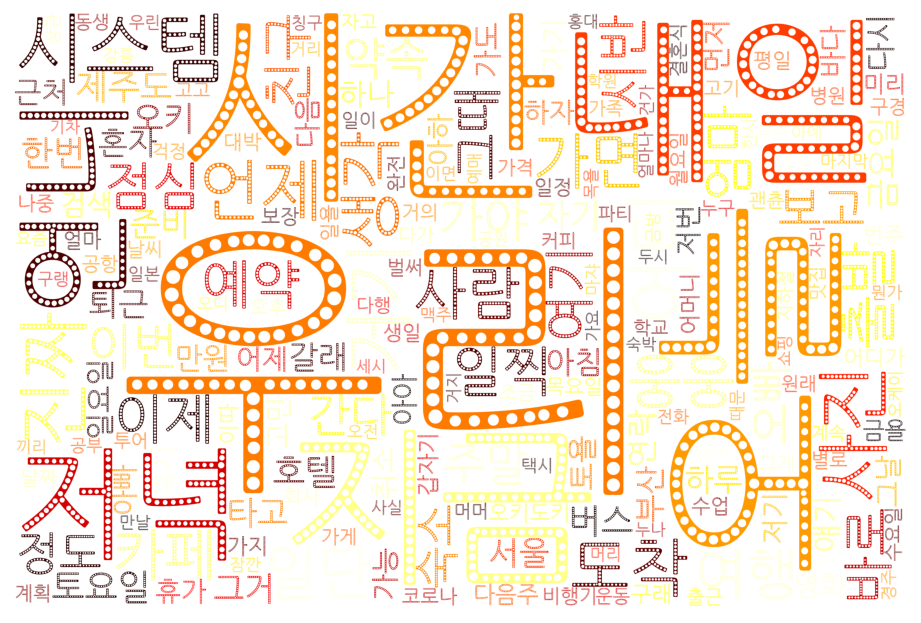

In [ ]:
plt.imshow(wordcloud) 
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
plt.axis('off') 
plt.show()

##행사 개최 지역 빈도 지도 시각화 (미완성)

folium를 활용해 지도에 지역구 영역을 표시하고 행사 현황을 시각화해보자.

행사 현황 = 총 대화에서 지역명이 언급된 횟수

예를 들어 데이터에서 서울이 45번, 부산이 20번 언급됐으면
<br/>지도에서 서울이 부산보다 더 진하게 표시된다.

위치정보와 지역명 빈도 데이터 병합

**참고 사이트**
<br/>[전국 인구 현황 지도 시각화](https://mkjjo.github.io/python/2019/08/18/korea_population.html)
<br/>[Folium을 이용한 데이타 시각화](https://blog.naver.com/PostView.nhn?blogId=kcchang61&logNo=221350672356)
<br/>[대한민국 최신 행정구역(SHP) 다운로드](http://www.gisdeveloper.co.kr/?p=2332)
<br/>[대한민국 행정구역 경계 JSON 파일 변환 및 다운받기](https://yeomss.tistory.com/267)
<br/>[대한민국 행정구역(시도, 시군구) GeoJSON 파일 다운로드 및 SHP 파일 단순화 후 변환 방법 설명](https://neurowhai.tistory.com/350)

In [ ]:
import requests
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins

In [ ]:
print(folium.__version__)

0.8.3


####행정구역(SHP) 데이터

행정구역 시/군/구 정보를 담고 있는 Json 파일 불러오기

In [ ]:
state_geo = '/content/drive/MyDrive/Dataton/TL_SCCO_SIG.json'

####행정구역명 데이터

[통계청 오픈 데이터](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1BPA002&vw_cd=&list_id=&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=K1)에서 지역명 리스트 가져오기

In [ ]:
population_path = '/content/drive/MyDrive/Dataton/행정구역_시군구_별_주민등록세대수_20220601135321.csv'
population_csv = pd.read_csv(population_path, encoding='CP949')

In [ ]:
area_csv = population_csv['행정구역(시군구)별']

In [ ]:
area_csv.to_csv("/content/drive/MyDrive/Dataton/area.csv", index = False)

In [ ]:
area_path = '/content/drive/MyDrive/Dataton/area.csv'
area_data = pd.read_csv(area_path)

In [ ]:
area_data.head

<bound method NDFrame.head of     행정구역(시군구)별
0           전국
1        서울특별시
2          종로구
3           중구
4          용산구
..         ...
287        거창군
288        합천군
289    제주특별자치도
290        제주시
291       서귀포시

[292 rows x 1 columns]>

In [ ]:
len(area_data)

292

In [ ]:
area_data[1:5]

,행정구역(시군구)별
1,서울특별시
2,종로구
3,중구
4,용산구


####행정구역별 지역명 빈도수 통계 데이터

행정구역별 지역명 언급 빈도 통계 데이터 csv 파일 만들기

In [ ]:
count = Counter(revised_onedim_X_okt_nouns_two)
words = dict(count.most_common())

In [ ]:
nouns_words_series = pd.Series(words)

In [ ]:
nouns_words_series

우리      1963
시간      1662
오늘      1571
내일      1214
지금      1116
        ... 
빠룸         1
졸업사진       1
학위         1
운젠         1
사부         1
Length: 18857, dtype: int64

In [ ]:
nouns_words_df = pd.DataFrame(nouns_words_series).reset_index()
nouns_words_df.columns = ['명사', '빈도수']

In [ ]:
nouns_words_df.to_csv('/content/drive/MyDrive/Dataton/nouns_words_dict.csv', index=False)

In [ ]:
nouns_words_dict_path = '/content/drive/MyDrive/Dataton/nouns_words_dict.csv'
nouns_words_dict_csv = pd.read_csv(nouns_words_dict_path)

In [ ]:
nouns_words_dict_csv[:3]

,명사,빈도수
0,우리,1963
1,시간,1662
2,오늘,1571


In [ ]:
nouns_words_dict_csv[nouns_words_dict_csv['명사'].str.contains('제주', na = False)]

,명사,빈도수
44,제주도,386
253,제주,80
1556,제주항공,12
5080,제주시,3


In [ ]:
sum(nouns_words_dict_csv[nouns_words_dict_csv['명사'].str.contains('제주', na = False)]['빈도수'])

481

In [ ]:
area_name_list = ['서울', '종로', '용산', '성동', '광진', '동대문', '중랑', '성북', '강북', '도봉', '노원', '은평', '서대문', '마포', '양천',
'강서', '구로', '금천', '영등포', '동작', '관악', '서초', '강남', '송파', '강동', '부산', '영도', '동래', '해운대', '사하', '금정', '연제', 
'사상', '기장', '대구', '수성', '달서', '달성', '인천', '미추홀', '연수', '남동', '부평', '계양', '강화', '옹진', '광주', '광산', '대전', '유성',
'대덕', '울산', '울주', '세종', '수원', '장안', '권선', '팔달', '영통', '성남', '중원', '분당', '의정부', '안양', '만안', '동안', '부천', '광명', 
'평택', '동두천', '안산', '상록', '단원', '고양', '덕양', '일산', '과천', '구리', '남양주', '오산', '시흥', '군포', '의왕', '하남', '용인', '처인',
'기흥', '수지', '파주', '이천', '안성', '김포', '화성', '광주', '양주', '포천', '여주', '연천', '가평', '양평', '춘천', '원주', '강릉', '동해', '태백',
'속초', '삼척', '홍천', '횡성', '영월', '평창', '정선', '철원', '화천', '양구', '인제', '고성', '양양', '청주', '상당', '흥덕', '청원', '충주',
'제천', '보은', '옥천', '영동', '증평', '진천', '괴산', '음성', '단양', '천안', '공주', '보령', '아산', '서산', '논산', '계룡', '당진', '금산', '부여', '서천',
'청양', '홍성', '예산', '태안', '전주', '완산', '덕진', '군산', '익산', '정읍', '남원', '김제', '완주', '진안', '무주', '임실', '순창', '고창', '부안',
'목포', '여수', '순천', '나주', '광양', '담양', '곡성', '구례', '고흥', '보성', '화순', '장흥', '강진', '해남', '영암', '무안', '함평', '영광', '장성',
'완도', '진도', '신안', '포항', '경주', '김천', '안동', '구미', '영주', '영천', '상주', '문경', '경산', '군위', '의성', '청송', '영양', '영덕', '청도',
'고령', '성주', '칠곡', '예천', '봉화', '울진', '울릉', '창원', '의창', '성산', '영양', '영덕', '청도', '고령', '성주', '칠곡', '마산', '진해',
'진주', '통영', '사천', '김해', '밀양', '거제', '양산', '의령', '함안', '창녕', '고성', '남해', '하동', '산청', '함양', '거창', '합천', '제주', '서귀포']

In [ ]:
len(area_name_list)

237

In [ ]:
area_df = pd.DataFrame({'지역명': ['지역'],
                             '빈도수':[0]})

In [ ]:
area_df2 = pd.DataFrame({'지역명': ['지역'],
                             '빈도수':[0]})

In [ ]:
for i in range(236):
  area_df = area_df.append(area_df2)

In [ ]:
len(area_df)

237

In [ ]:
for i in range(len(area_name_list)):
  area_df['지역명'][i:i+1] = area_name_list[i]
  area_df['빈도수'][i:i+1]= sum(nouns_words_dict_csv[nouns_words_dict_csv['명사'].str.contains(area_name_list[i], na = False)]['빈도수'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
area_df

,지역명,빈도수
0,서울,381
0,종로,25
0,용산,26
0,성동,3
0,광진,0
...,...,...
0,함양,2
0,거창,0
0,합천,6
0,제주,481


In [ ]:
area_code_list = [11140, 11110, 11170, 11200, 11215, 11230, 11260, 11290, 11305, 11320, 11350, 11380, 11410, 11440, 11470,
11500, 11530, 11545, 11560, 11590, 11620, 11650, 11680, 11710, 11740 , 26110, 26200, 26260, 26350, 26380, 26410, 26470,
26530, 26710, 27110, 27290, 27290, 27710, 28110, 28170, 28185, 28200, 28237, 28245, 28710, 28720, 29110, 29200, 30140, 30200,
30230, 31110, 31710, 29010, 41110, 41111, 41113, 41115, 41117, 41130, 41133, 41135, 41150, 41170, 41171, 41173, 41190, 41210, 
41220, 41250, 41270, 41271, 41273, 41280, 41281, 41285, 41290, 41310, 41360, 41370, 41390, 41410, 41430, 41450, 41460, 41461,
41463, 41465, 41480, 41500, 41550, 41570, 41590, 41610, 41630, 41650, 41730, 41800, 41820, 41830, 42110, 42130, 42150, 42170, 42190,
42210, 42230, 42720, 42730, 42750, 42760, 42770, 42780, 42790, 42800, 42810, 42820, 42830, 43110, 43111, 43113, 43710, 43130,
43150, 43720, 43730, 43740, 43745, 43750, 43760, 43770, 43800, 44130, 44150, 44180, 44200, 44210, 44230, 44250, 44830, 44710, 44760, 44770,
44790, 44800, 44810, 44825, 45110, 45111, 45113, 45130, 45140, 45180, 45190, 45210, 45710, 45720, 45730, 45750, 45770, 45790, 45800,
46110, 46130, 46150, 46170, 46230, 46710, 46720, 46730, 46770, 46780, 46790, 46800, 46810, 46820, 46830, 46840, 46860, 46870, 46880,
46890, 46900, 46910, 47110, 47130, 47150, 47170, 47190, 47210, 47230, 47250, 47280, 47290, 47720, 47730, 47750, 47760, 47770, 47820,
47830, 47840, 47850, 47900, 47920, 47930, 47940, 48120, 48121, 48123, 47760, 47770, 47820, 47830, 47840, 47850, 48125, 48129,
48170, 48220, 48240, 48250, 48270, 48310, 48330, 48720, 48730, 48740, 48820, 48840, 48850, 48860 , 48870, 48880, 48890, 50110, 50130]

In [ ]:
len(area_code_list)

237

In [ ]:
for i in range(len(area_name_list)):
  area_df['지역명'][i:i+1] = area_code_list[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
area_df

,지역명,빈도수
0,11140,381
0,11110,25
0,11170,26
0,11200,3
0,11215,0
...,...,...
0,48870,2
0,48880,0
0,48890,6
0,50110,481


In [ ]:
area_df['지역명'] = area_df.지역명.map(lambda x : str(x).zfill(5))

###행정구역별 지역명 빈도수 지도

In [ ]:
basic_map = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7.4)

basic_map.choropleth(
    geo_data=state_geo,
    name='지역명 언급 빈도수',
    data=area_df,
    columns=['지역명', '빈도수'],
    key_on='feature.properties.SIG_CD',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = 'Frequency'
)

folium.LayerControl().add_to(basic_map)

basic_map 

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
basic_map.save('/content/drive/MyDrive/Dataton/area_name_frequency_basic_map.html')

###버블 차트

In [ ]:
import json
json_data=open(state_geo).read()
jsonResult = json.loads(json_data)

In [ ]:
def center_calc(points_df):
    x = points_df.x
    y = points_df.y

    X = (max(x)+min(x))/2.
    Y = (max(y)+min(y))/2.

    return X, Y

In [ ]:
# 다중 Array 구조 이중으로 변환
def points_array(points):

    final_points = []

    for x in range(0, len(points)):

        if len(points[x]) == 2:
            final_points.append(points[x])
        else:
            target = points[x]
            for y in range(0, len(target)):
                final_points.append(target[y])

    return final_points

In [ ]:
center_locations = pd.DataFrame()
codes = []
names = []
x_list = []
y_list = []
for x in range(0, len(jsonResult['features'])):
    code = jsonResult['features'][x]['properties']['SIG_CD']
    name = jsonResult['features'][x]['properties']['SIG_KOR_NM']
    # 중앙값 생성
    points = jsonResult['features'][x]['geometry']['coordinates'][0]
    points = points_array(points)
    points_df = pd.DataFrame(points)
    points_df.columns = ['x','y']
    X, Y = center_calc(points_df)

    # 결과
    codes.append(code)
    names.append(name)
    x_list.append(X)
    y_list.append(Y)

# 데이터 프레임 생성
center_locations['지역명'] = codes
center_locations['NAME'] = names
center_locations['X'] = x_list
center_locations['Y'] = y_list

In [ ]:
target_df = pd.merge(area_df,center_locations, how = 'left', on = '지역명')
target_df = target_df[~np.isnan(target_df['X'])] # 위치 정보 없는 값 제외

In [ ]:
# Initialize the map:
bubble_m = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7)


# I can add marker one by one on the map
for i in range(0,len(target_df)):
    latitude = target_df.iloc[i]['Y']
    longitude = target_df.iloc[i]['X']
    location=(latitude, longitude)
    folium.CircleMarker(location, radius=target_df.iloc[i]['빈도수']/25000,color='#3186cc',fill_color='#3186cc', popup=target_df.iloc[i]['NAME']).add_to(bubble_m)


folium.LayerControl(collapsed=False).add_to(bubble_m)


bubble_m

In [ ]:
# Save to html
bubble_m.save('/content/drive/MyDrive/Dataton/area_name_frequency_bubble_map.html')

###히트맵

In [ ]:
from folium import plugins
from folium.plugins import HeatMap

In [ ]:
heat_map = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7)

heat_df = target_df[['Y', 'X']]

# List comprehension to make out list of lists
heat_data = [[row['Y'],row['X']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(heat_map)

# Display the map
heat_map

In [ ]:
len(nouns_words_dict_csv)

#Okt로 추출된 명사의 갯수

#결론

#참고문헌

유원준 외 1명, 딥러닝을 이용한 자연어 처리 입문, wikidocs, 2022
<br/>[잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)](https://wikidocs.net/30708)
<br/><br/>[카톡 데이터로 워드 클라우드 그리기](https://m.blog.naver.com/nilsine11202/221834254905)